In [1]:
import re
import requests
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
url = "http://gutenberg.net.au/ebooks01/0100021.txt"
r = requests.get(url)
text = r.text

In [3]:
irregular_verbs_list = [
    "went", "saw", "thought", "brought", "bought", "caught", "taught", "sent", "bent", "lent",
    "spent", "burnt", "dealt", "felt", "knelt", "slept", "swept", "wept", "cost", "lost",
    "meant", "built", "crept", "dug", "dreamt", "fed", "fled", "fought", "froze", "hung",
    "leapt", "melted", "read", "rose", "sank", "sang", "shook", "slid", "smelt", "spoke",
    "stuck", "stung", "swam", "swung", "tore", "threw", "understood", "woke", "wore"
]

In [4]:
def get_count_past_tense_verbs(text: str):
    # Convert text to lowercase and remove punctuation
    clean_text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Define pattern for regular past tense verbs
    verb_pattern = re.compile(r'\b\w+ed\b')
    past_verbs = re.findall(verb_pattern, clean_text)
    
    # Define pattern for irregular past tense verbs
    irregular_verbs = irregular_verbs_list
    irregular_pattern = re.compile(r'\b(' + "|".join(irregular_verbs) + r')\b')
    irregular_past_verbs = re.findall(irregular_pattern, clean_text)
    
    return Counter(past_verbs), Counter(irregular_past_verbs)


In [5]:
def display_top_verbs(verb_list, title: str):
    top_10_verbs = verb_list[:10]
    
    # Print the top verbs
    print(f"Top 10 {title}:")
    for verb, count in top_10_verbs:
        print(f"{verb}: {count} times")
    
    # Plot the counts
    plt.figure(figsize=(10, 6))
    plt.bar(range(10), [count for _, count in top_10_verbs], alpha=0.5, align='center')
    plt.xticks(range(10), [verb for verb, _ in top_10_verbs], rotation=45)
    plt.xlabel("Verbs")
    plt.ylabel("Count")
    plt.title(title)
    plt.show()
    
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(verb_list))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {title}")
    plt.show()



Top 10 Past Tense Verbs:
thought: 186 times
seemed: 173 times
looked: 82 times
turned: 74 times
went: 67 times
called: 65 times
happened: 65 times
bed: 54 times
felt: 54 times
saw: 53 times


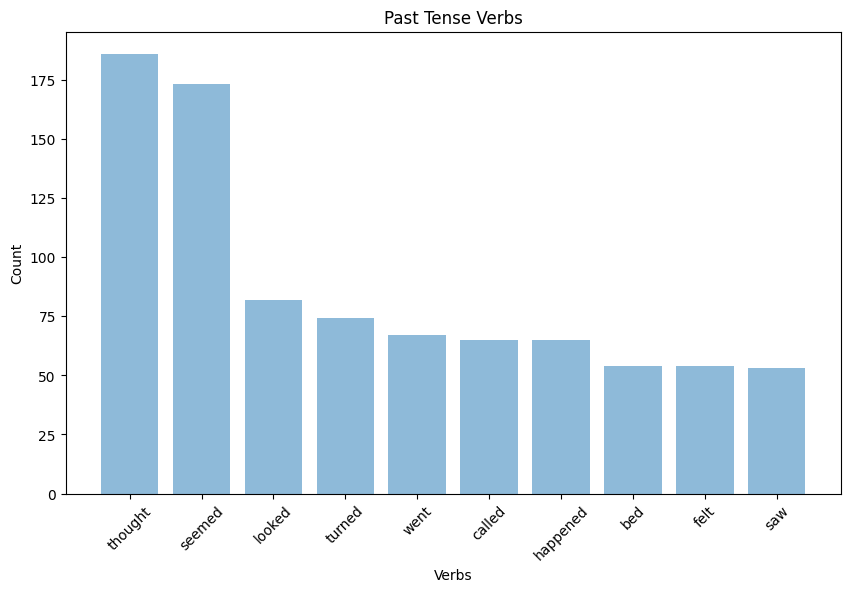

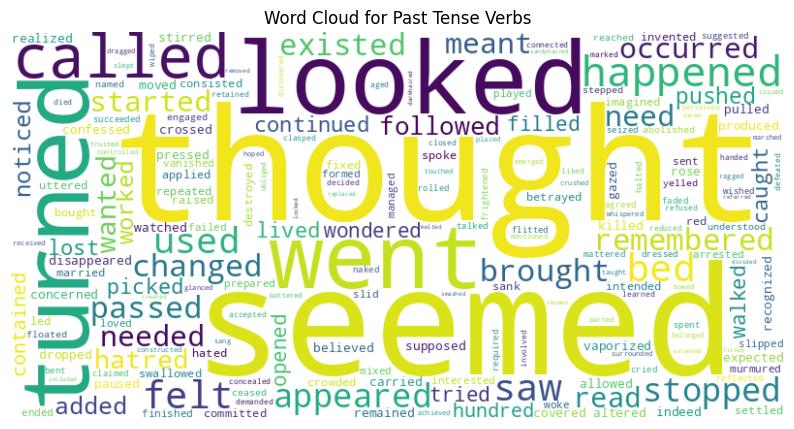

In [6]:
regular_verb_counts, irregular_verb_counts = get_count_past_tense_verbs(text)

# Combine the counts for regular and irregular verbs
all_verb_counts = list(regular_verb_counts.items()) + list(irregular_verb_counts.items())

# Sort the combined list by count in descending order
all_verb_counts.sort(key=lambda x: x[1], reverse=True)

# Display the top verbs
display_top_verbs(all_verb_counts, "Past Tense Verbs")